# Ejemplo 3

In [1]:
setwd("D:/Estadistica")

In [3]:
DATOS<-read.table("cucarachas.csv", header=TRUE, sep=",")
DATOS

TIEMPO,ESTATUS,PESO,GRUPO
20,1,5.385,A
34,1,7.413,A
1,1,9.266,A
2,1,6.228,A
3,1,5.229,A
3,1,9.699,A
50,0,1.973,A
26,1,5.838,A
1,1,2.088,A
50,0,0.237,A


In [8]:
library(survival)

**Desempeño del insecticida.**

**Objetivos**

* Identificar el grupo del que se presentan más muertes.
* Identificar si el peso afecta la supervivencia.

**Análisis descriptivo.**

In [6]:
sum(DATOS$ESTATUS)

[1] 130

Número de eventos de interés

In [9]:
length(DATOS$ESTATUS)-sum(DATOS$ESTATUS)

[1] 20

Número de eventos censurados

**Cálculo de tiempo promedio para ítems**

**Censurados**

In [12]:
mean(DATOS$TIEMPO[DATOS$ESTATUS==0])

[1] 50

**Evento de interés**

In [13]:
mean(DATOS$TIEMPO[DATOS$ESTATUS==1])

[1] 9.815385

**Gráfica de pastel**

## Análisis de supervivencia

In [14]:
d1<-Surv(DATOS$TIEMPO, DATOS$ESTATUS) #Cuando tenemos 0 y 1, no es necesario especificar
d1

  [1] 20  34   1   2   3   3  50+ 26   1  50+ 21   3  13  11  22  50+ 50+  1 
 [19] 50+  9  50+  1  13  50+ 50+  1   6  50+ 50+ 50+ 36   3  46  10  50+  1 
 [37] 18   3  36  37  50+  7   1   1   7  24   4  50+ 12  17   1   1   1  21 
 [55] 50+ 50+  1  46  50+  1   8   2  12   3   2   1   5  50+  1   2   2   4 
 [73] 17   5   1  11   8   1   5   2  41   5  21   1  38  50+  3  19   4   7 
 [91]  1  46   2   5  40   4  50+  2   1  17   7   1   5   1   1   5   6   2 
[109] 24   1   1   1   1   7  13   6  11  46   5  14   2   1  20   2  20   1 
[127] 23  11   1   1  20   9   1   1   1   1   7  11   1   3   1   5   9  21 
[145] 10  11  30   1   1  17 

**Estimación de Kaplan Meier**

*Estimación sin discriminante*

In [15]:
KM.d1<-survfit(d1~1)
KM.d1

Call: survfit(formula = d1 ~ 1)

      n  events  median 0.95LCL 0.95UCL 
    150     130       7       5      11 

In [16]:
summary(KM.d1)

Call: survfit(formula = d1 ~ 1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1    150      39    0.740  0.0358       0.6730        0.814
    2    111      11    0.667  0.0385       0.5953        0.747
    3    100       8    0.613  0.0398       0.5401        0.696
    4     92       4    0.587  0.0402       0.5129        0.671
    5     88       9    0.527  0.0408       0.4525        0.613
    6     79       3    0.507  0.0408       0.4327        0.593
    7     76       6    0.467  0.0407       0.3933        0.554
    8     70       2    0.453  0.0406       0.3803        0.540
    9     68       3    0.433  0.0405       0.3609        0.520
   10     65       2    0.420  0.0403       0.3480        0.507
   11     63       6    0.380  0.0396       0.3097        0.466
   12     57       2    0.367  0.0393       0.2971        0.452
   13     55       3    0.347  0.0389       0.2783        0.432
   14     52       1    0.340  0.0387       0.2720        0.425
   17  

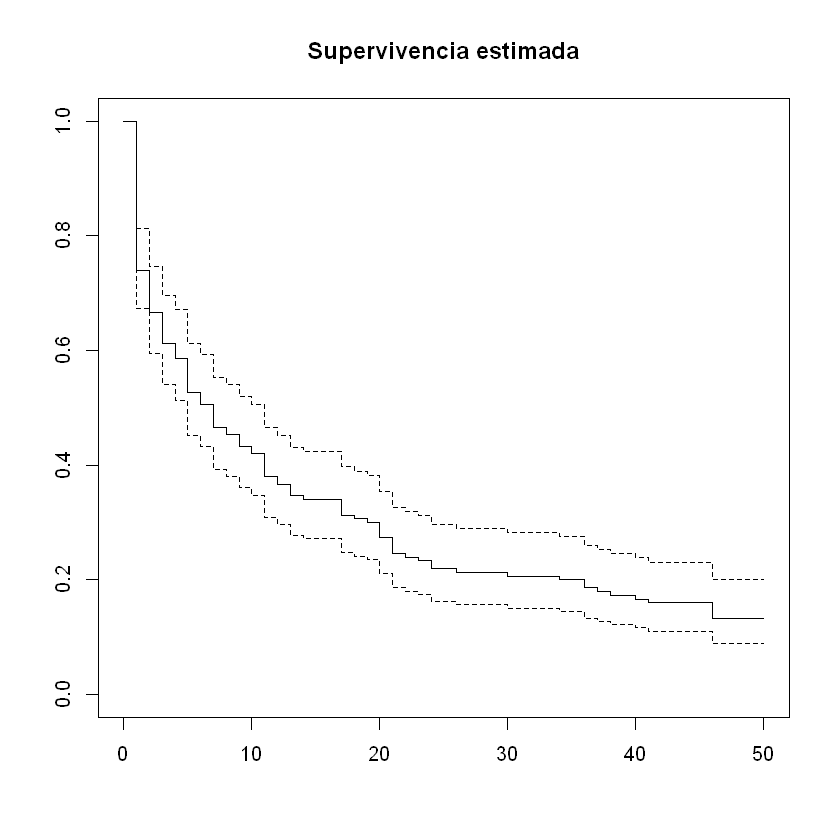

In [17]:
plot(KM.d1, main="Supervivencia estimada")

**Estimación por grupo**

In [19]:
KM.d2<-survfit(d1~DATOS$GRUPO)
KM.d2

Call: survfit(formula = d1 ~ DATOS$GRUPO)

               n events median 0.95LCL 0.95UCL
DATOS$GRUPO=A 50     36   17.5       9      36
DATOS$GRUPO=B 50     44    5.0       2      12
DATOS$GRUPO=C 50     50    5.0       1       9

In [20]:
summary(KM.d2)

Call: survfit(formula = d1 ~ DATOS$GRUPO)

                DATOS$GRUPO=A 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1     50       8     0.84  0.0518        0.744        0.948
    2     42       1     0.82  0.0543        0.720        0.934
    3     41       5     0.72  0.0635        0.606        0.856
    4     36       1     0.70  0.0648        0.584        0.839
    6     35       1     0.68  0.0660        0.562        0.822
    7     34       2     0.64  0.0679        0.520        0.788
    9     32       1     0.62  0.0686        0.499        0.770
   10     31       1     0.60  0.0693        0.478        0.752
   11     30       1     0.58  0.0698        0.458        0.734
   12     29       1     0.56  0.0702        0.438        0.716
   13     28       2     0.52  0.0707        0.398        0.679
   17     26       1     0.50  0.0707        0.379        0.660
   18     25       1     0.48  0.0707        0.360        0.641
   20     24       1     0.46 

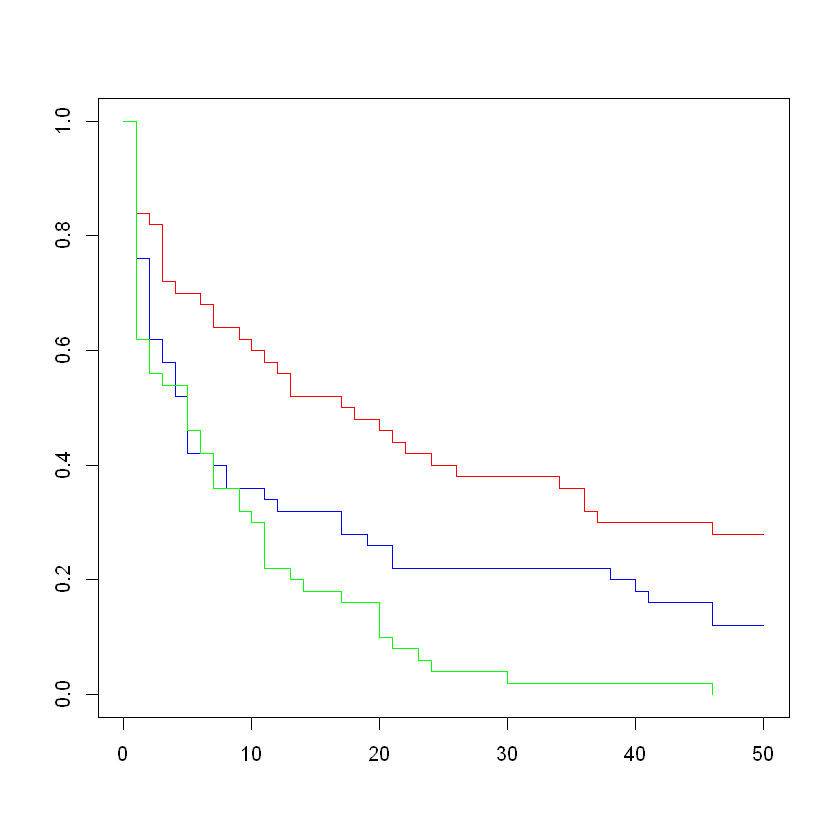

In [21]:
plot(KM.d2, col=c("red", "blue", "green"))

**Prueba de igualdad**

In [23]:
KM.d3<-survdiff(d1~DATOS$GRUPO, rho=0)
KM.d3

Call:
survdiff(formula = d1 ~ DATOS$GRUPO, rho = 0)

               N Observed Expected (O-E)^2/E (O-E)^2/V
DATOS$GRUPO=A 50       36     56.4     7.406     15.29
DATOS$GRUPO=B 50       44     41.2     0.192      0.32
DATOS$GRUPO=C 50       50     32.4     9.608     15.49

 Chisq= 20.7  on 2 degrees of freedom, p= 3e-05 

*Las funciones difieren.*

**Comparación por pares (A vs B)**

In [24]:
KM.d3<-survdiff(d1[DATOS$GRUPO!="C"]~DATOS$GRUPO[DATOS$GRUPO!="C"], rho=0)
KM.d3

Call:
survdiff(formula = d1[DATOS$GRUPO != "C"] ~ DATOS$GRUPO[DATOS$GRUPO != 
    "C"], rho = 0)

                                   N Observed Expected (O-E)^2/E (O-E)^2/V
DATOS$GRUPO[DATOS$GRUPO != "C"]=A 50       36     45.9      2.15      5.57
DATOS$GRUPO[DATOS$GRUPO != "C"]=B 50       44     34.1      2.89      5.57

 Chisq= 5.6  on 1 degrees of freedom, p= 0.02 

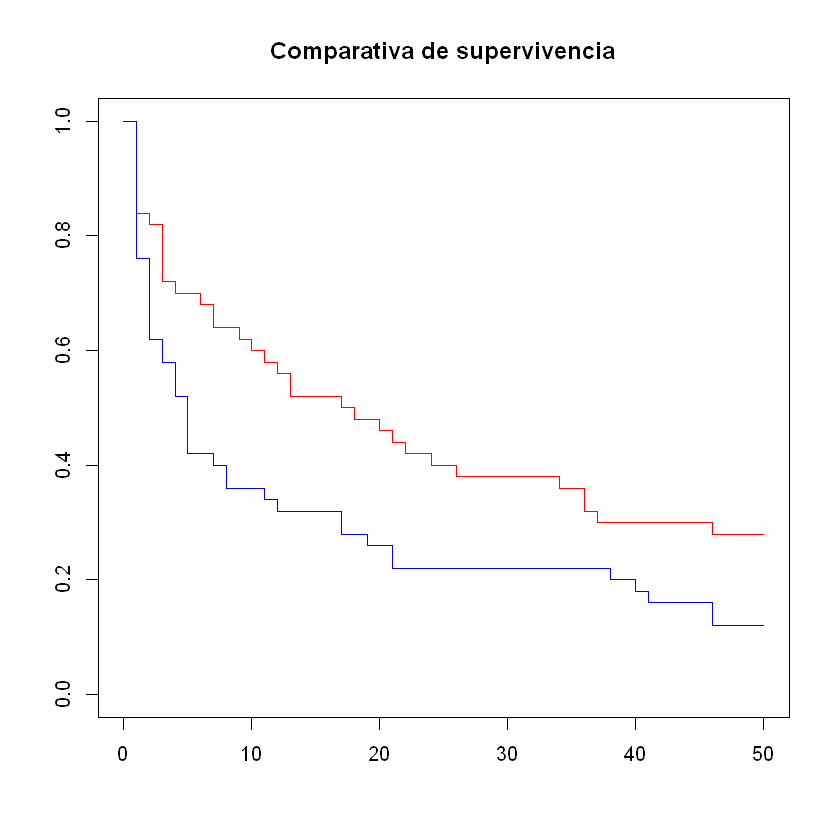

In [25]:
plot(KM.d2[-3], col=c("red", "blue"), main="Comparativa de supervivencia")

**B vs C**

In [26]:
KM.d4<-survdiff(d1[DATOS$GRUPO!="A"]~DATOS$GRUPO[DATOS$GRUPO!="A"], rho=0)
KM.d4

Call:
survdiff(formula = d1[DATOS$GRUPO != "A"] ~ DATOS$GRUPO[DATOS$GRUPO != 
    "A"], rho = 0)

                                   N Observed Expected (O-E)^2/E (O-E)^2/V
DATOS$GRUPO[DATOS$GRUPO != "A"]=B 50       44       53      1.52      4.39
DATOS$GRUPO[DATOS$GRUPO != "A"]=C 50       50       41      1.96      4.39

 Chisq= 4.4  on 1 degrees of freedom, p= 0.04 

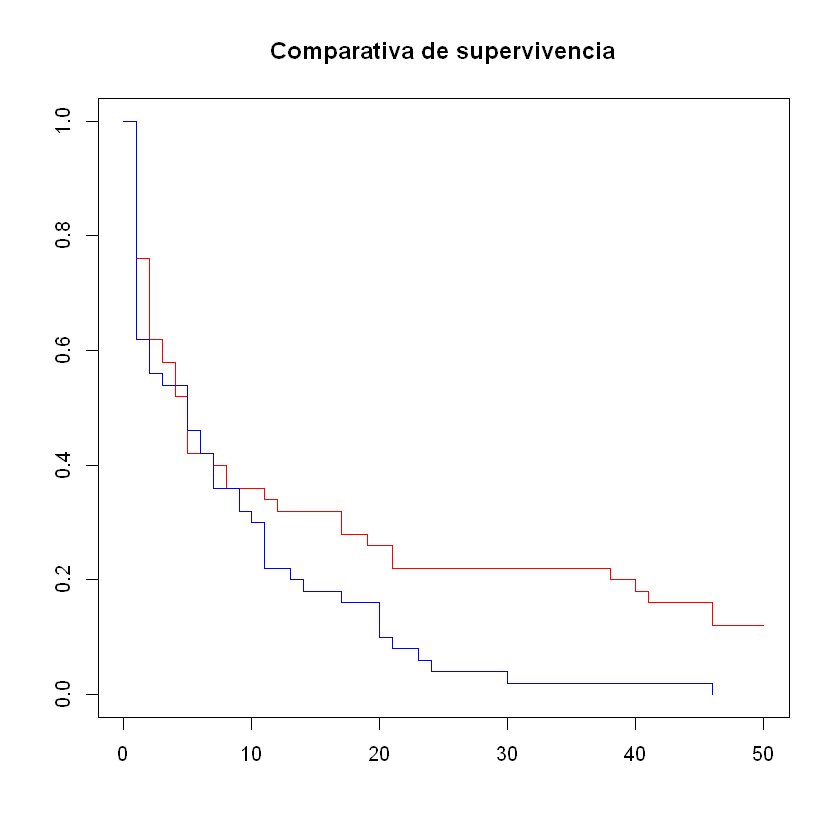

In [27]:
plot(KM.d2[-1], col=c("red", "blue"), main="Comparativa de supervivencia")

**A vs C**

In [28]:
KM.d5<-survdiff(d1[DATOS$GRUPO!="B"]~DATOS$GRUPO[DATOS$GRUPO!="B"], rho=0)
KM.d5

Call:
survdiff(formula = d1[DATOS$GRUPO != "B"] ~ DATOS$GRUPO[DATOS$GRUPO != 
    "B"], rho = 0)

                                   N Observed Expected (O-E)^2/E (O-E)^2/V
DATOS$GRUPO[DATOS$GRUPO != "B"]=A 50       36     55.1       6.6      23.1
DATOS$GRUPO[DATOS$GRUPO != "B"]=C 50       50     30.9      11.8      23.1

 Chisq= 23.1  on 1 degrees of freedom, p= 2e-06 

*El mejor desempeño lo muestra el insecticida es del grupo C*
(Dado que es el de la gráfica inferior, y dado que quiero que mueran por el insecticida, es el de menos supervivencia, comprobado después de haber hecho la prueba)

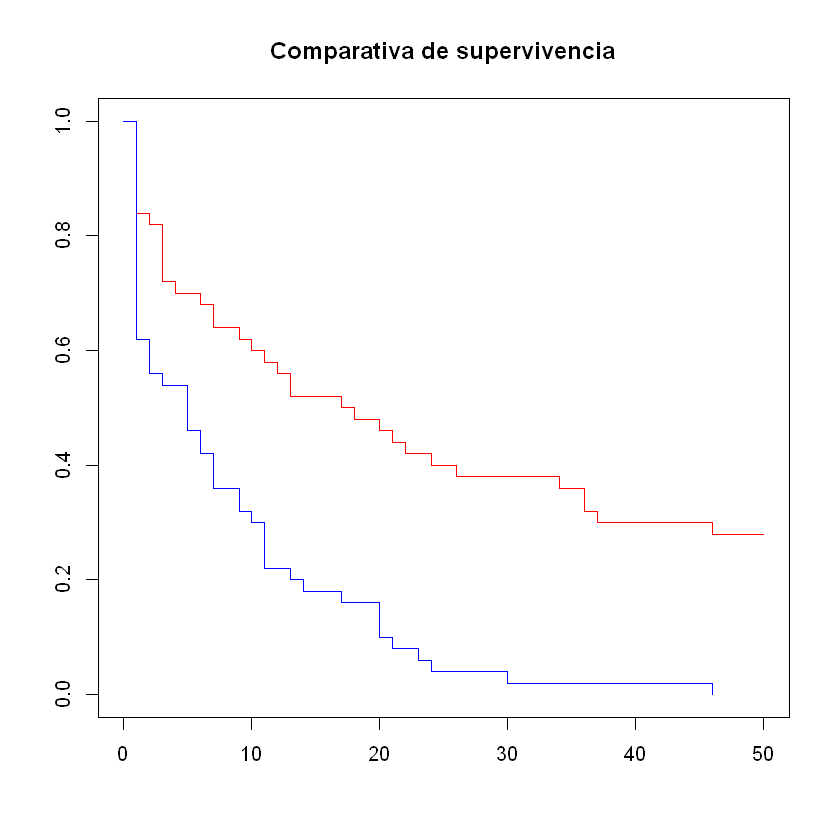

In [29]:
plot(KM.d2[-2], col=c("red", "blue"), main="Comparativa de supervivencia")

**Análisis de influencia de peso**

In [30]:
DATOS$PESO

[1]  5.385  7.413  9.266  6.228  5.229  9.699  1.973  5.838  2.088  0.237
 [11]  6.814  5.502  1.137  6.323  7.384  8.713  7.458  1.424  1.312  5.162
 [21]  7.187  4.677  6.548  5.903  2.113  7.617  3.737  8.972  6.523  2.165
 [31]  4.895  6.538  1.674  6.726  2.671  4.949  4.819  5.080  3.532  4.406
 [41]  6.286  5.529  2.270  5.245  9.675  5.610  4.297  3.179  6.776  0.466
 [51]  0.626  1.221  0.124  0.320  2.282  0.287  3.468  7.314  4.901  5.418
 [61]  6.344  1.163 12.126 11.561  8.333  0.055 10.583  9.534 13.182 10.156
 [71] 16.881 15.452 16.831 18.947 19.099 19.000  9.652  1.544 10.786  4.130
 [81]  2.200  7.567 14.581 26.259  0.440 18.188  6.789 16.669 38.177 29.154
 [91] 14.578  1.569  0.345 33.929 28.958 38.139 26.822 39.501  9.264 22.880
[101] 27.480 35.069  4.974 41.521 42.090 25.037  9.509 23.682  0.352 19.589
[111]  7.426  7.913  2.370  5.533 18.800 18.508  3.343 26.926  2.388 21.567
[121]  5.594 17.150 15.986  1.588  2.055 16.074 12.086 20.524  6.493  7.258
[131] 16.635 10.324  5.228  0.784  5.587  5.011  7.441  3.690  4.708  9.207
[141]  1.400  6.309  1.784  0.767  1.993  1.030  2.875  1.820  0.974  0.100

In [33]:
summary(DATOS$PESO)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.055   2.459   6.316   9.390  11.955  42.090 

In [34]:
peso.aux<-rep(0, length(DATOS$PESO))
#considerando la mediana como corte
peso.aux[DATOS$PESO>6.316]<-1

In [35]:
sum(peso.aux)

[1] 75

In [36]:
KM.P<-survfit(d1~peso.aux)
KM.P

Call: survfit(formula = d1 ~ peso.aux)

            n events median 0.95LCL 0.95UCL
peso.aux=0 75     63      7       3      18
peso.aux=1 75     67      6       4      11

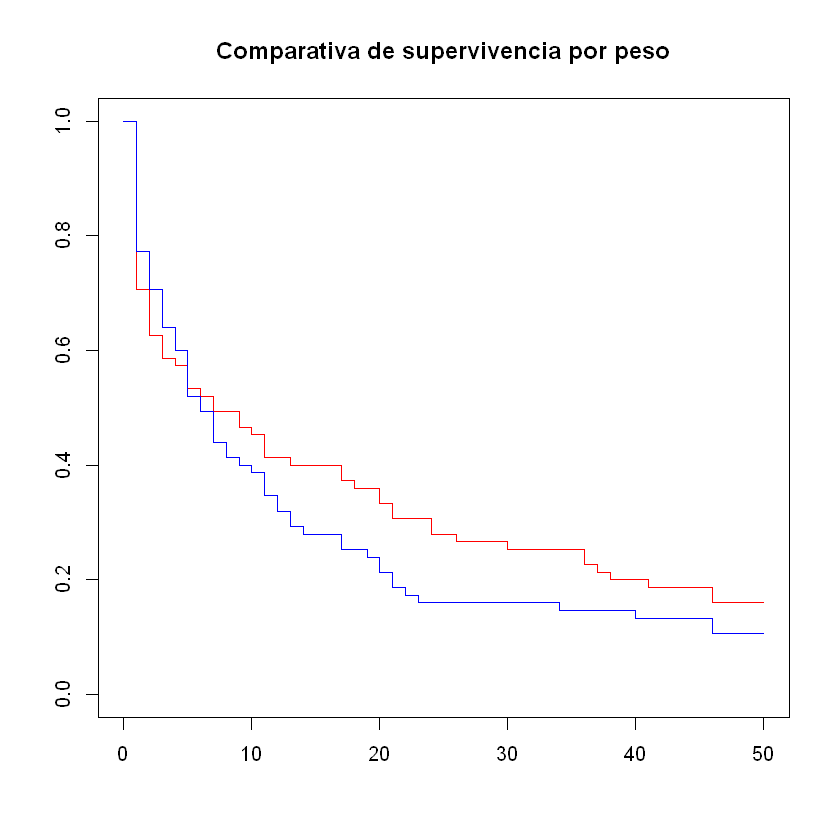

In [38]:
plot(KM.P, col=c("red", "blue"), main="Comparativa de supervivencia por peso")

In [37]:
summary(KM.P)

Call: survfit(formula = d1 ~ peso.aux)

                peso.aux=0 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1     75      22    0.707  0.0526       0.6108        0.818
    2     53       6    0.627  0.0559       0.5262        0.746
    3     47       3    0.587  0.0569       0.4852        0.709
    4     44       1    0.573  0.0571       0.4716        0.697
    5     43       3    0.533  0.0576       0.4316        0.659
    6     40       1    0.520  0.0577       0.4184        0.646
    7     39       2    0.493  0.0577       0.3922        0.621
    9     37       2    0.467  0.0576       0.3664        0.594
   10     35       1    0.453  0.0575       0.3536        0.581
   11     34       3    0.413  0.0569       0.3156        0.541
   13     31       1    0.400  0.0566       0.3032        0.528
   17     30       2    0.373  0.0559       0.2785        0.501
   18     28       1    0.360  0.0554       0.2662        0.487
   20     27       2    0.333  0.054

**Comparativa de funciones de supervivencia**

In [41]:
survdiff(d1~peso.aux, rho=0)

Call:
survdiff(formula = d1 ~ peso.aux, rho = 0)

            N Observed Expected (O-E)^2/E (O-E)^2/V
peso.aux=0 75       63     68.6     0.454       1.1
peso.aux=1 75       67     61.4     0.507       1.1

 Chisq= 1.1  on 1 degrees of freedom, p= 0.3 

*Aquí no difieren, al menos no por este comparativo*

**Supervivencia para Cucarachas "grandes" por Grupo**

In [44]:
DATOS.g<-DATOS[DATOS$PESO>6.316,]
DATOS.g

,TIEMPO,ESTATUS,PESO,GRUPO
2,34,1,7.413,A
3,1,1,9.266,A
6,3,1,9.699,A
11,21,1,6.814,A
14,11,1,6.323,A
15,22,1,7.384,A
16,50,0,8.713,A
17,50,0,7.458,A
21,50,0,7.187,A
23,13,1,6.548,A


In [48]:
dg<-Surv(DATOS.g$TIEMPO, DATOS.g$ESTATUS)
dg

 [1] 34   1   3  21  11  22  50+ 50+ 50+ 13   1  50+ 50+  3  10   7  12  46   8 
[20] 12   3   2   5  50+  1   2   2   4  17   5   1  11   8   5   5  21   1  50+
[39]  3  19   4   7   1   5  40   4  50+  2   1  17   7   1   1   1   5   6   2 
[58]  1   1   1  13   6  46  14   1  20   1  23  11   1   1  20   9   7   3 

In [49]:
KM.gG<-survfit(dg~DATOS.g$GRUPO)
KM.gG

Call: survfit(formula = dg ~ DATOS.g$GRUPO)

                 n events median 0.95LCL 0.95UCL
DATOS.g$GRUPO=A 17     12     13      10      NA
DATOS.g$GRUPO=B 33     30      5       4      12
DATOS.g$GRUPO=C 25     25      5       1      11

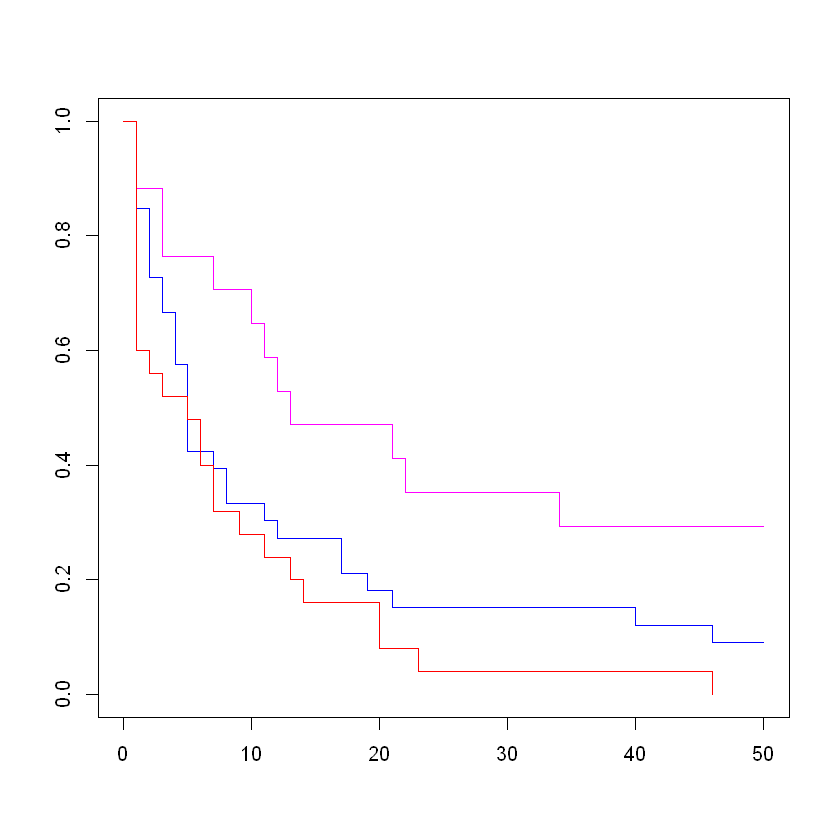

In [53]:
plot(KM.gG, col=c("magenta", "blue", "red"))

In [52]:
survdiff(dg~DATOS.g$GRUPO, rho=0)

Call:
survdiff(formula = dg ~ DATOS.g$GRUPO, rho = 0)

                 N Observed Expected (O-E)^2/E (O-E)^2/V
DATOS.g$GRUPO=A 17       12     21.7     4.338     7.314
DATOS.g$GRUPO=B 33       30     27.9     0.154     0.294
DATOS.g$GRUPO=C 25       25     17.4     3.353     5.191

 Chisq= 9  on 2 degrees of freedom, p= 0.01 

*Aquí los datos difieren, por lo que tendríamos que hacer una comparación por pares*